
## CREATE A SHORTCUT OF THE SHARED FOLDER(the drive link for controlnet provided in github repo) IN YOUR GOOGLE DRIVE. THE CODE SHOULD RUN FINE. USE GPU.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install diffusers

In [ ]:
%cd /content/drive/MyDrive/EVERYTHING_CONTROLNET

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers.utils import load_image
import torch
import matplotlib.pyplot as plt
from PIL import Image

controlnet = ControlNetModel.from_pretrained("./controlnet", torch_dtype=torch.float16)
pipeline = StableDiffusionControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", controlnet=controlnet, torch_dtype=torch.float16
).to("cuda")

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

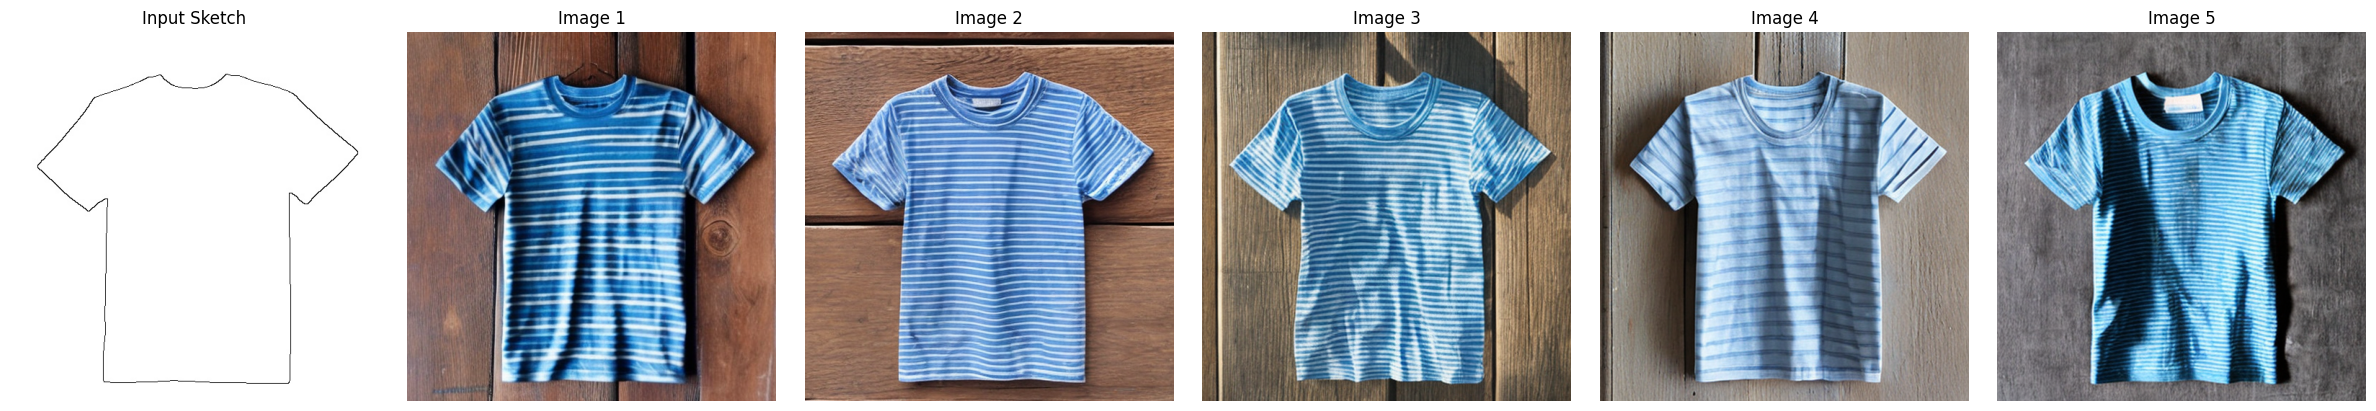

Image saved to /content/generated_image.png


In [ ]:
#AT RESIZED RESOLUTION OF 512*512, single channel to multichannel

import torch
import matplotlib.pyplot as plt
from PIL import Image

# Load the control image
control_image = Image.open("/content/IMAGE.jpg") #YOUR SKETCH NAME

# Ensure the image is converted to 3-channel grayscale if it's single-channel
if control_image.mode == "L":  # "L" means it's grayscale (single-channel)
    control_image = control_image.convert("RGB")  # Convert to 3-channel grayscale

# Ensure the image is resized to 512x512 before passing it to the model
if control_image.size != (512, 512):
    control_image = control_image.resize((512, 512), Image.LANCZOS)

prompt = "a blue stripped tshirt, laid flat, top view"  # EXAMPLE PROMPT

# List to store generated images
generated_images = []

# Generate 5 images and store them
for i in range(5): # CHANGE IT TO GENERATE THE DESIRED NUMBER OF SAMPLES
    generator = torch.manual_seed(i)
    image = pipeline(prompt, num_inference_steps=20, generator=generator, image=control_image).images[0]
    generated_images.append(image)

# Plotting
fig, axes = plt.subplots(1, 6, figsize=(24, 4))

# Plot the input image first
axes[0].imshow(control_image, cmap="gray")  # Ensure grayscale display
axes[0].axis('off')
axes[0].set_title("Input Sketch")

# Loop through the generated images and display them
for i, image in enumerate(generated_images):
    axes[i+1].imshow(image)
    axes[i+1].axis('off')
    axes[i+1].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


# Save the generated image to local Colab storage
output_path = "/content/generated_image.png"
generated_images[0].save(output_path)

print(f"Image saved to {output_path}")